<a href="https://colab.research.google.com/github/gauravreddy08/sql-project-HMS/blob/main/notebooks/03_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision in TensorFlow

 



In [1]:
# # Getting the Data ready
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-05-18 09:37:15--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.133.128, 74.125.140.128, 108.177.15.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.133.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M  95.1MB/s    in 1.1s    

2021-05-18 09:37:17 (95.1 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



In [2]:
## Inspect the Data : Become ONE with it.

!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [3]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are{len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are2 directories and 1 images in 'pizza_steak'.
There are2 directories and 1 images in 'pizza_steak/test'.
There are0 directories and 250 images in 'pizza_steak/test/pizza'.
There are0 directories and 250 images in 'pizza_steak/test/steak'.
There are2 directories and 1 images in 'pizza_steak/train'.
There are0 directories and 750 images in 'pizza_steak/train/pizza'.
There are0 directories and 750 images in 'pizza_steak/train/steak'.


In [4]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [5]:
class_names = ["pizza", "steak"]
class_names

['pizza', 'steak']

In [6]:
# Lets Visualize images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_image(target_dir, target_class):
  target_folder = target_dir+target_class

  random_img = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_img[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image Shape : {img.shape}")
  return img


Image Shape : (512, 512, 3)


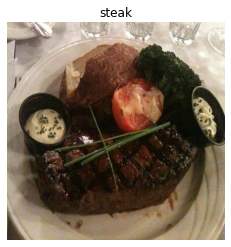

In [7]:
s = view_image("pizza_steak/train/", "steak")

In [8]:
s.shape

(512, 512, 3)

* Load our Images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN 
* Fit the CNN to the training data

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# Normalizing our Data
training_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to out data directories

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import Data from dorectory and turn it to batches

train_data = training_datagen.flow_from_directory(directory=train_dir,
                                                  batch_size=32,
                                                  target_size=(224, 224),
                                                  class_mode = "binary",
                                                  seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode = "binary",
                                               seed=42)

model_1 = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(filters=10,
                            kernel_size=3,
                            activation='relu',
                            input_shape=(224, 224, 3)),
            tf.keras.layers.Conv2D(10, 3, activation='relu'),
            tf.keras.layers.MaxPool2D(pool_size=2,
                                      padding='valid'),
            tf.keras.layers.Conv2D(10, 3, activation='relu'),
            tf.keras.layers.Conv2D(10, 3, activation='relu'),
            tf.keras.layers.MaxPool2D(2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(1, activation="sigmoid")            
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

# history_1 = model_1.fit(train_data, 
                      # epochs=5, 
                      # steps_per_epoch=len(train_data),
                      # validation_data = valid_data,
                      # validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 43s 266ms/step - loss: 0.6592 - accuracy: 0.6179 - val_loss: 0.4153 - val_accuracy: 0.8220
Epoch 2/5
47/47 [==============================] - 11s 227ms/step - loss: 0.4341 - accuracy: 0.8088 - val_loss: 0.3473 - val_accuracy: 0.8620
Epoch 3/5
47/47 [==============================] - 11s 227ms/step - loss: 0.4208 - accuracy: 0.8086 - val_loss: 0.3160 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 11s 232ms/step - loss: 0.3541 - accuracy: 0.8593 - val_loss: 0.3149 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 11s 236ms/step - loss: 0.3286 - accuracy: 0.8754 - val_loss: 0.3003 - val_accuracy: 0.8720


In [10]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [11]:
tf.random.set_seed(42)

model_2 = tf.keras.models.Sequential([
              tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
              tf.keras.layers.Dense(4, activation='relu'),
              tf.keras.layers.Dense(4, activation='relu'),
              tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# history_2 = model_2.fit(train_data,
#                       epochs=5,
#                       steps_per_epoch=len(train_data),
#                       validation_data=valid_data,
#                       validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 213ms/step - loss: 0.9614 - accuracy: 0.4772 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 205ms/step - loss: 0.6933 - accuracy: 0.4915 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 204ms/step - loss: 0.6933 - accuracy: 0.4764 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 203ms/step - loss: 0.6931 - accuracy: 0.5094 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 204ms/step - loss: 0.6930 - accuracy: 0.5148 - val_loss: 0.6932 - val_accuracy: 0.5000


In [12]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite 20x more parameters than CNN `model_2` performs terribly

In [13]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
      tf.keras.layers.Dense(100, activation='relu'),
      tf.keras.layers.Dense(100, activation='relu'),
      tf.keras.layers.Dense(100, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# history_3 = model_3.fit(train_data,
#                         epochs=5,
#                         steps_per_epoch=len(train_data),
#                         validation_data=valid_data,
#                         validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 214ms/step - loss: 5.1518 - accuracy: 0.5261 - val_loss: 0.6244 - val_accuracy: 0.7460
Epoch 2/5
47/47 [==============================] - 10s 209ms/step - loss: 0.7006 - accuracy: 0.7140 - val_loss: 0.6752 - val_accuracy: 0.7160
Epoch 3/5
47/47 [==============================] - 10s 206ms/step - loss: 0.6648 - accuracy: 0.7099 - val_loss: 0.5183 - val_accuracy: 0.7560
Epoch 4/5
47/47 [==============================] - 10s 210ms/step - loss: 0.5976 - accuracy: 0.7658 - val_loss: 0.4793 - val_accuracy: 0.7640
Epoch 5/5
47/47 [==============================] - 10s 210ms/step - loss: 0.4680 - accuracy: 0.7935 - val_loss: 0.5705 - val_accuracy: 0.7340


In [14]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


Despite 500x more parameters than CNN, `model_3` performs terrible than the CNN model

## Breaking down the CNN Model we built

* Data Visualization
* Preprocess Data
* Create a model (baseline)
* Fit the model
* Evaliate the model
* Adjusting the hyper-parameters
* Repeat-Repeat 

### Becoming one with the Data

Image Shape : (512, 512, 3)
Image Shape : (512, 382, 3)


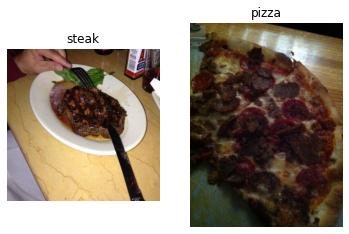

In [15]:
plt.figure()

plt.subplot(1, 2, 1)
steak_img = view_image("pizza_steak/train/", "steak")

plt.subplot(1, 2, 2)
pizza_img = view_image("pizza_steak/train/", "pizza")

### Preprocess the Data

In [16]:
# Define directory dataset paths 
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

A **batch** is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time.

It does this for a couple of reasons:
* 10,000 images (or more) might not fit into the memory of your processor (GPU).
* Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

A [batch size of 32 is good for your health](https://twitter.com/ylecun/status/989610208497360896?s=20). 

No seriously, there are many different batch sizes you could use but 32 has proven to be very effective in many different use cases and is often the default for many data preprocessing functions.

To turn our data into batches, we'll first create an instance of [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) for each of our datasets.


In [17]:
# Create Train and Test Data Generators

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

In [18]:
# Now that we rescaled (Normalise) now turn them into batchs

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary')

test_data = train_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224, 224),
                                               class_mode='binary')

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [19]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [20]:
images[0], images[0].shape

(array([[[0.47058827, 0.40784317, 0.34509805],
         [0.4784314 , 0.427451  , 0.3647059 ],
         [0.48627454, 0.43529415, 0.37254903],
         ...,
         [0.8313726 , 0.70980394, 0.48627454],
         [0.8431373 , 0.73333335, 0.5372549 ],
         [0.87843144, 0.7725491 , 0.5882353 ]],
 
        [[0.50980395, 0.427451  , 0.36078432],
         [0.5058824 , 0.42352945, 0.35686275],
         [0.5137255 , 0.4431373 , 0.3647059 ],
         ...,
         [0.82745105, 0.7058824 , 0.48235297],
         [0.82745105, 0.70980394, 0.5058824 ],
         [0.8431373 , 0.73333335, 0.5372549 ]],
 
        [[0.5254902 , 0.427451  , 0.34901962],
         [0.5372549 , 0.43921572, 0.36078432],
         [0.5372549 , 0.45098042, 0.36078432],
         ...,
         [0.82745105, 0.7019608 , 0.4784314 ],
         [0.82745105, 0.7058824 , 0.49411768],
         [0.8352942 , 0.7176471 , 0.5137255 ]],
 
        ...,
 
        [[0.77647066, 0.5647059 , 0.2901961 ],
         [0.7803922 , 0.53333336, 0.22352

### Creating a Baseline CNN Model

In [21]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [22]:
# Baseline Model 

model_4 = Sequential([
      Conv2D(10, 3,  activation='relu', input_shape=(224, 224, 3)),
      Conv2D(10, 3, activation='relu'),
      Conv2D(10, 3, activation='relu'),
      Flatten(),
      Dense(1, activation='sigmoid')
])

model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])

# history_4 = model_4.fit(train_data,
#                         epochs=5,
#                         steps_per_epoch = len(train_data),
#                         validation_data=test_data,
#                         validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 251ms/step - loss: 1.9921 - accuracy: 0.5964 - val_loss: 0.5822 - val_accuracy: 0.7320
Epoch 2/5
47/47 [==============================] - 11s 238ms/step - loss: 0.5184 - accuracy: 0.7850 - val_loss: 0.4466 - val_accuracy: 0.8100
Epoch 3/5
47/47 [==============================] - 11s 239ms/step - loss: 0.3914 - accuracy: 0.8364 - val_loss: 0.3838 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 11s 238ms/step - loss: 0.2547 - accuracy: 0.9118 - val_loss: 0.3918 - val_accuracy: 0.8180
Epoch 5/5
47/47 [==============================] - 12s 245ms/step - loss: 0.0774 - accuracy: 0.9804 - val_loss: 0.7760 - val_accuracy: 0.7420


In [23]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


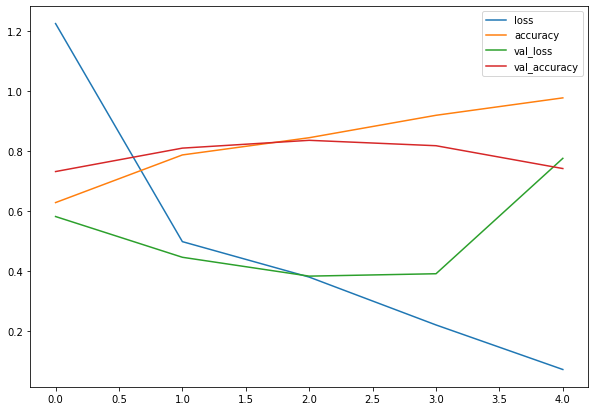

In [24]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

While the `accuracy` on training data increased gradually the test data did not show much difference. Same with the `loss` score

This is the case of **Overfitiing**

In [25]:
model_5 = Sequential([
    Conv2D(10, 3 , input_shape=(224, 224, 3), activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_5.compile(loss = "binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# history_5 = model_5.fit(train_data,
#                         epochs=5,
#                         steps_per_epoch=len(train_data),
#                         validation_data=test_data,
#                         validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 225ms/step - loss: 0.6870 - accuracy: 0.5690 - val_loss: 0.5199 - val_accuracy: 0.7880
Epoch 2/5
47/47 [==============================] - 10s 218ms/step - loss: 0.4876 - accuracy: 0.7888 - val_loss: 0.4015 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 10s 216ms/step - loss: 0.4388 - accuracy: 0.8063 - val_loss: 0.3512 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 10s 216ms/step - loss: 0.3988 - accuracy: 0.8173 - val_loss: 0.3629 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 10s 220ms/step - loss: 0.3571 - accuracy: 0.8362 - val_loss: 0.3323 - val_accuracy: 0.8540


In [26]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

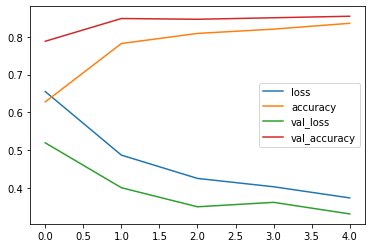

In [27]:
pd.DataFrame(history_5.history).plot()

### Adding Data Augmentation 

In [28]:
train_datagen_aug = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=0.2, # rotate the image slightly
                                   shear_range=0.2, # shear the image
                                   zoom_range=0.2, # zoom into the image
                                   width_shift_range=0.2, # shift the image width ways
                                   height_shift_range=0.2, # shift the image height ways
                                   horizontal_flip=True) 

# Create ImageDataGenerator without Data Augmentation 

train_datagen = ImageDataGenerator(rescale=1/225)
test_datagen = ImageDataGenerator(rescale=1/225)

In [29]:
print("Augmented Data")
train_data_aug = train_datagen_aug.flow_from_directory(train_dir,
                                                       target_size=(224, 224),
                                                       class_mode='binary',
                                                       shuffle=False)

print("Normal Data")
train_data = train_datagen.flow_from_directory(train_dir,
                                                       target_size=(224, 224),
                                                       class_mode='binary',
                                                       shuffle=False)

Augmented Data
Found 1500 images belonging to 2 classes.
Normal Data
Found 1500 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


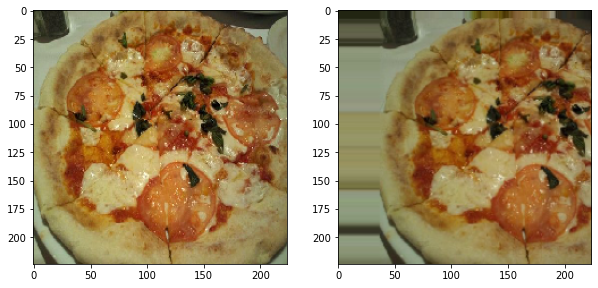

In [30]:
images, labels = train_data[0]
images1, labels1 = train_data_aug[0]

plt.figure(figsize=(10, 7))
plt.subplot(1, 2, 1)
plt.imshow(images[0])
plt.subplot(1, 2, 2)
plt.imshow(images1[0])

In [31]:
model_6 = Sequential([
        Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
        MaxPool2D(pool_size=2),
        Conv2D(10, 3, activation='relu'),
        MaxPool2D(),
        Conv2D(10, 3, activation='relu'),
        MaxPool2D(),
        Flatten(),
        Dense(1, activation='sigmoid')
])

model_6.compile(loss = "binary_crossentropy",
                optimizer=Adam(),
                metrics='accuracy')

# history_6 = model_6.fit(train_data_aug,
#                         epochs=5,
#                         steps_per_epoch=len(train_data),
#                         validation_data=test_data,
#                         validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 559ms/step - loss: 0.7087 - accuracy: 0.4215 - val_loss: 0.6815 - val_accuracy: 0.5040
Epoch 2/5
47/47 [==============================] - 26s 550ms/step - loss: 0.6933 - accuracy: 0.5122 - val_loss: 0.6811 - val_accuracy: 0.7340
Epoch 3/5
47/47 [==============================] - 26s 547ms/step - loss: 0.6888 - accuracy: 0.6576 - val_loss: 0.6769 - val_accuracy: 0.5060
Epoch 4/5
47/47 [==============================] - 26s 545ms/step - loss: 0.6921 - accuracy: 0.4651 - val_loss: 0.6539 - val_accuracy: 0.5920
Epoch 5/5
47/47 [==============================] - 26s 552ms/step - loss: 0.6843 - accuracy: 0.5644 - val_loss: 0.6552 - val_accuracy: 0.7920


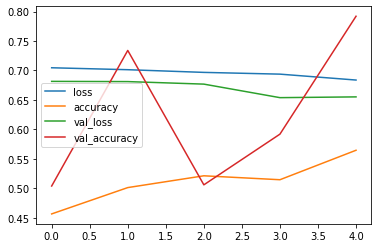

In [32]:
pd.DataFrame(history_6.history).plot()

In [33]:
train_data_aug = train_datagen_aug.flow_from_directory(train_dir,
                                                       target_size=(224, 224),
                                                       class_mode='binary',
                                                       shuffle=True)

Found 1500 images belonging to 2 classes.


In [34]:
model_7 = Sequential([
        Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
        MaxPool2D(pool_size=2),
        Conv2D(10, 3, activation='relu'),
        MaxPool2D(),
        Conv2D(10, 3, activation='relu'),
        MaxPool2D(),
        Flatten(),
        Dense(1, activation='sigmoid')
])

model_7.compile(loss = "binary_crossentropy",
                optimizer=Adam(),
                metrics='accuracy')

# history_7 = model_7.fit(train_data_aug,
#                         epochs=5,
#                         steps_per_epoch=len(train_data),
#                         validation_data=test_data,
#                         validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 559ms/step - loss: 0.6635 - accuracy: 0.5890 - val_loss: 0.5389 - val_accuracy: 0.7500
Epoch 2/5
47/47 [==============================] - 26s 551ms/step - loss: 0.5515 - accuracy: 0.7248 - val_loss: 0.3577 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 26s 551ms/step - loss: 0.4865 - accuracy: 0.7627 - val_loss: 0.3415 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 26s 548ms/step - loss: 0.4903 - accuracy: 0.7523 - val_loss: 0.3595 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 26s 550ms/step - loss: 0.4756 - accuracy: 0.7966 - val_loss: 0.4308 - val_accuracy: 0.8040


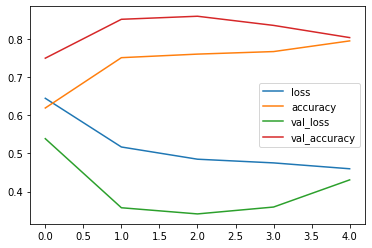

In [35]:
pd.DataFrame(history_7.history).plot()

--2021-05-18 09:46:47--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2021-05-18 09:46:47 (29.5 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



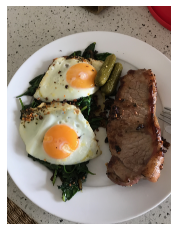

In [36]:
## Making prediction with our trained model
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [37]:
def load_prep_img(filename, shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size=[shape, shape])
  img = img/225.
  return img

In [38]:
steak = load_prep_img("03-steak.jpeg")

In [39]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))

In [40]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [41]:
def pred_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_prep_img(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img);
  plt.title(f"Prediction: {pred_class}");
  plt.axis(False);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


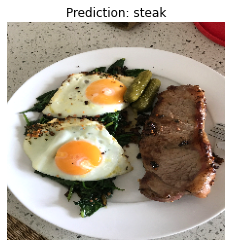

In [42]:
pred_plot(model_7, filename="03-steak.jpeg")

--2021-05-18 09:46:50--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.06s   

2021-05-18 09:46:50 (42.8 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


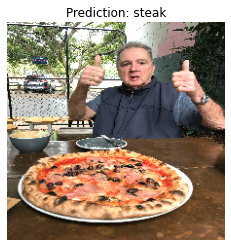

In [43]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_plot(model_7, "03-pizza-dad.jpeg", class_names)

# Multi Class Classification

In [44]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-05-18 09:46:51--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.166.128, 64.233.184.128, 74.125.133.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.166.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  97.2MB/s    in 5.4s    

2021-05-18 09:46:57 (92.1 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [45]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 

Image Shape : (512, 512, 3)


array([[[211, 233, 187],
        [214, 235, 192],
        [215, 236, 193],
        ...,
        [ 76,  62,  51],
        [ 77,  60,  50],
        [ 78,  61,  51]],

       [[215, 233, 191],
        [219, 237, 195],
        [219, 237, 197],
        ...,
        [ 83,  69,  58],
        [ 83,  66,  56],
        [ 74,  57,  47]],

       [[212, 230, 192],
        [216, 234, 196],
        [215, 233, 195],
        ...,
        [ 85,  71,  58],
        [ 85,  69,  56],
        [ 78,  62,  49]],

       ...,

       [[226, 240, 207],
        [214, 228, 193],
        [206, 220, 185],
        ...,
        [159, 168, 163],
        [155, 166, 162],
        [161, 172, 168]],

       [[218, 233, 202],
        [217, 232, 201],
        [214, 229, 196],
        ...,
        [163, 172, 169],
        [156, 167, 163],
        [160, 171, 167]],

       [[219, 234, 203],
        [225, 240, 209],
        [221, 236, 205],
        ...,
        [185, 194, 191],
        [177, 186, 183],
        [179, 190, 186]]

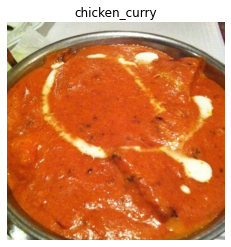

In [46]:
view_image("10_food_classes_all_data/train/", "chicken_curry")

In [47]:
import pathlib
import numpy as np

data_dir = pathlib.Path("10_food_classes_all_data/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [48]:
# Define directory dataset paths 
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [49]:
# Create Train and Test Data Generators

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

In [50]:
# Now that we rescaled (Normalise) now turn them into batchs

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224))

test_data = train_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224, 224))

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [51]:
model_8 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_8.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=Adam(),
                metrics=['accuracy'])

In [52]:
# history_8 = model_8.fit(train_data,
#                         epochs=5,
#                         steps_per_epoch=len(train_data),
#                         validation_data=test_data,
#                         validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 57s 240ms/step - loss: 2.2803 - accuracy: 0.1260 - val_loss: 2.0163 - val_accuracy: 0.2796
Epoch 2/5
235/235 [==============================] - 54s 231ms/step - loss: 1.9372 - accuracy: 0.3195 - val_loss: 1.8827 - val_accuracy: 0.3364
Epoch 3/5
235/235 [==============================] - 56s 239ms/step - loss: 1.5720 - accuracy: 0.4740 - val_loss: 1.9781 - val_accuracy: 0.3156
Epoch 4/5
235/235 [==============================] - 56s 239ms/step - loss: 0.9113 - accuracy: 0.7113 - val_loss: 2.6023 - val_accuracy: 0.2880
Epoch 5/5
235/235 [==============================] - 57s 241ms/step - loss: 0.3399 - accuracy: 0.9024 - val_loss: 3.6911 - val_accuracy: 0.2748


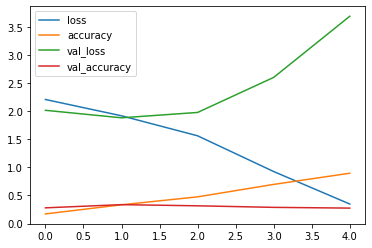

In [53]:

pd.DataFrame(history_8.history).plot()

Its Overfitting again

In [56]:
model_9 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_9.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=Adam(),
                metrics=['accuracy'])

In [57]:
# history_9 = model_9.fit(train_data,
#                         epochs=5,
#                         steps_per_epoch=len(train_data),
#                         validation_data=test_data,
#                         validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 51s 213ms/step - loss: 2.1953 - accuracy: 0.1910 - val_loss: 1.9214 - val_accuracy: 0.3220
Epoch 2/5
235/235 [==============================] - 51s 215ms/step - loss: 1.8433 - accuracy: 0.3600 - val_loss: 1.8456 - val_accuracy: 0.3532
Epoch 3/5
235/235 [==============================] - 51s 217ms/step - loss: 1.5651 - accuracy: 0.4763 - val_loss: 1.8080 - val_accuracy: 0.3736
Epoch 4/5
235/235 [==============================] - 51s 219ms/step - loss: 1.0780 - accuracy: 0.6639 - val_loss: 2.0328 - val_accuracy: 0.3452
Epoch 5/5
235/235 [==============================] - 52s 220ms/step - loss: 0.6041 - accuracy: 0.8288 - val_loss: 2.5510 - val_accuracy: 0.3132


In [58]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 28090)            

In [59]:
model_9.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 220, 220, 10)      760       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 29160)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                291610    
Total params: 293,280
Trainable params: 293,280
Non-trainable params: 0
________________________________________________

In [64]:
train_datagen_aug = ImageDataGenerator(rescale=1/255.,
                                       rotation_range=0.25,
                                       width_shift_range=0.25,
                                       height_shift_range=0.25,
                                       zoom_range=0.25,
                                       shear_range=0.25,
                                       horizontal_flip=True,
                                       vertical_flip=True)

train_data_aug = train_datagen_aug.flow_from_directory(train_dir,
                                                       target_size=(224, 224))

Found 7500 images belonging to 10 classes.


In [ ]:
model_10 = Sequential([
    Conv2D(10, 5, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(5, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_10.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=Adam(),
                metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 52s 218ms/step - loss: 2.2872 - accuracy: 0.1425 - val_loss: 2.0210 - val_accuracy: 0.2736
Epoch 2/5
235/235 [==============================] - 51s 216ms/step - loss: 1.9569 - accuracy: 0.3160 - val_loss: 1.9480 - val_accuracy: 0.3060
Epoch 3/5
118/235 [==============>...............] - ETA: 19s - loss: 1.6210 - accuracy: 0.4723